<a href="https://colab.research.google.com/github/pavanthisppm/Wine-Quality-Prediction/blob/main/Red_Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

Red Wine Quality Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv Data set information: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names The following are explanations of the columns (variables):

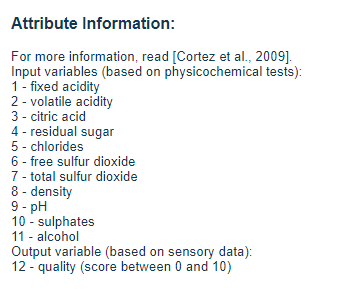

There are 12 columns which represent 11 features and the one target variable ‘quality’.


**Problem introduction** The problem is how to predict red wine quality is bad or good based on its other attributes using past data.

**My approach** Try to create a suitable model to predict the wine quality (good/bad) using a random forest classifier.

**Importing Libraries and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" ,sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Cleaning Data**

**Rename the column names**

In [ ]:
#There are spaces between some column names. Replace those spaces by underscore(‘_’). 
df.columns = df.columns.str.replace(' ', '_')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Remove Duplicates**

In [ ]:
#Number of duplicate rows
print('Number of duplicated rows =', df.duplicated().sum())

Number of duplicated rows = 240


In [ ]:
#Remove duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print('Number of rows after removing duplicates =', len(df))

Number of rows after removing duplicates = 1359


# **Data analysis and Visualization**

In [ ]:
#Number of rows and columns
df.shape

(1359, 12)

In [ ]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1359 non-null   float64
 1   volatile_acidity      1359 non-null   float64
 2   citric_acid           1359 non-null   float64
 3   residual_sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free_sulfur_dioxide   1359 non-null   float64
 6   total_sulfur_dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


In [ ]:
#Missing values
print('Number of missing values:',df.isna().sum().sum())

Number of missing values: 0


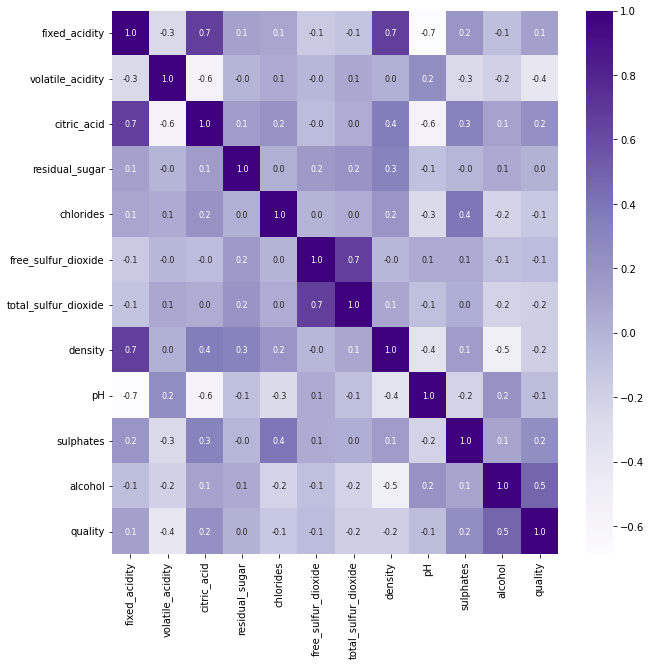

In [ ]:
#Correlation matrix
#Draw a heat map to understand the correlation between the variables. 
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

This heat map shows that there is a significant relationship between the two variables quality and volatile acidity. It’s a negative correlation. And also there is a positive significant correlation between quality and alcohol. Therefore volatile acidity and alcohol may be more important when creating a model to predict wine quality.

In [ ]:
#Number of observations in each quality group
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

We can notice there is a data imbalance here. Using a graphical method this can be visualized clearly.

<Figure size 288x288 with 0 Axes>

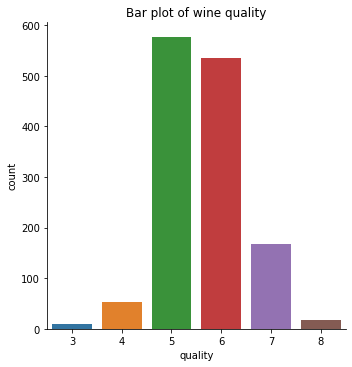

In [ ]:
#Barplot of wine quality
plt.figure(figsize = (4,4))
sn.catplot(x='quality', data=df, kind='count')
plt.title("Bar plot of wine quality")
plt.show()

Quality level score is in between 3 and 8. It doesn’t mean much and also data are extremely imbalanced. Bar sizes of quality score 5 and 6 are extremely larger than others. To overcome this problems split this in to 2 groups and try to balance it. Create a new variable called 'qualityN'. When the red wine quality is less than or equal to 5 consider the quality as ‘Bad’ and marks it as ‘0’. When the red wine quality is greater than 5 consider the quality as ‘Good’ and mark it as ‘1’.

In [ ]:
#Wine quality split in to 2 classes; Good(1), Bad(0)
df['qualityN']=pd.cut(df['quality'],bins=[0,5.5,10], labels=[0,1])
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,qualityN
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
#counts
df.qualityN.value_counts()

1    719
0    640
Name: qualityN, dtype: int64

There are 719 good quality wines and 640 bad quality wines. According to the new quality labels, data set is quite balanced. Following bar plot also visually represent that.

<Figure size 288x288 with 0 Axes>

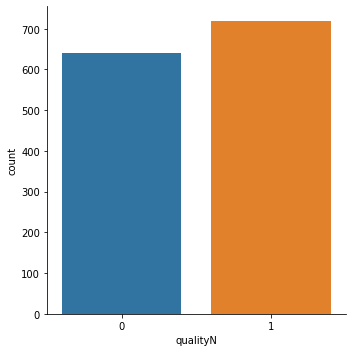

In [ ]:
#Bar plot after new quality labels
plt.figure(figsize = (4,4))
sn.catplot(x='qualityN', data=df, kind='count')
plt.show()

# **Training and Testing datasets**

In [ ]:
#Defining the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['qualityN','quality'],axis='columns'),df.qualityN,test_size=0.2)

**Applying Random Forest Classifier**

In [ ]:
#Train classifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

**Accuracy**

In [ ]:
print('Accuracy:',model.score(X_test,Y_test)*100,'%')

Accuracy: 75.36764705882352 %
